In [62]:
import pyod
import matplotlib.pyplot as plt
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from sklearn.metrics import balanced_accuracy_score
import sklearn
import numpy as np
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.utils import check_random_state

# Exercise 1

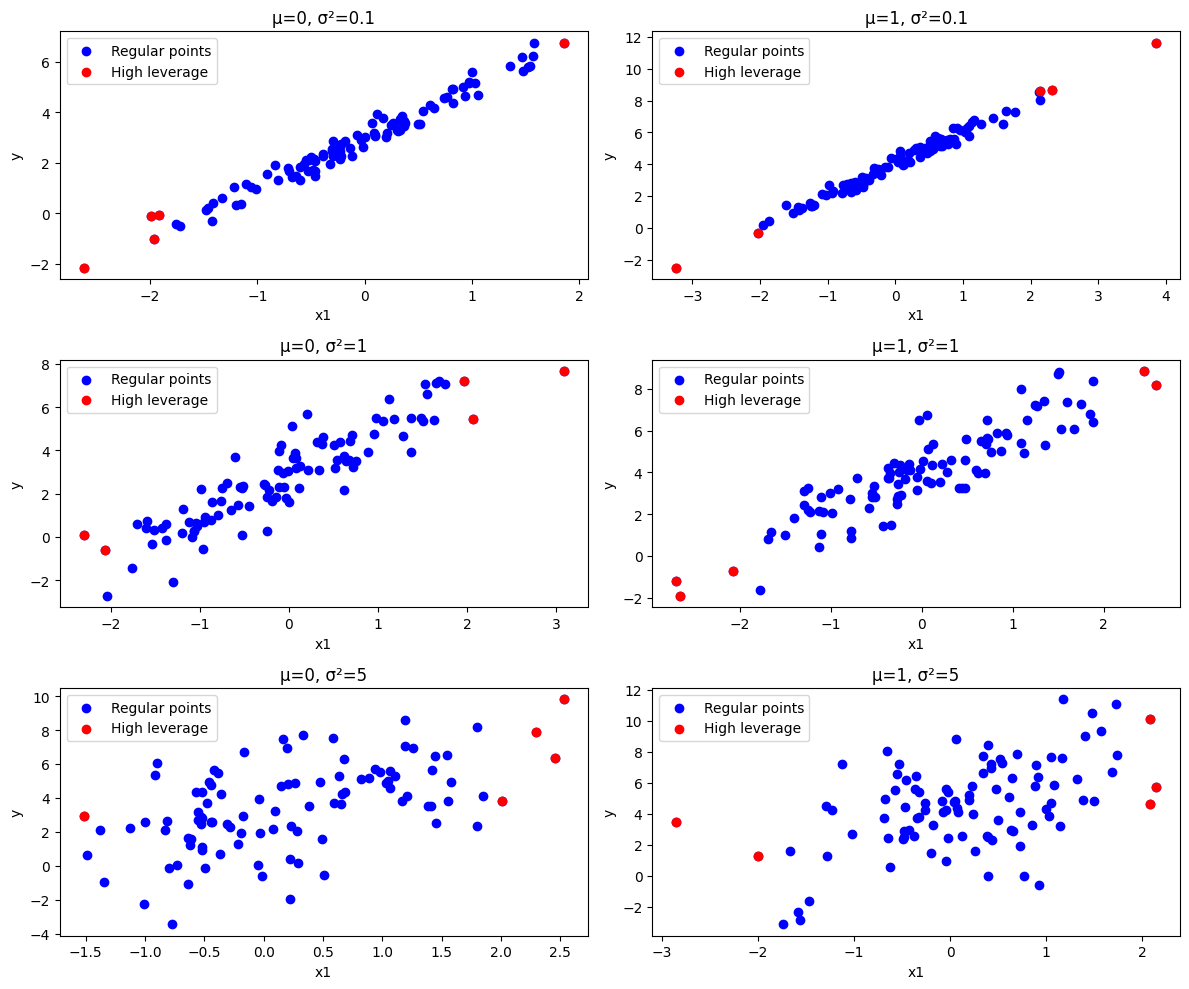

In [61]:
def leverage_scores(X):
    H = X @ np.linalg.pinv(X.T @ X) @ X.T
    return np.diag(H)

n_points = 100
a, b = 2.0, 3.0
mu_values = [0, 1]         
sigma2_values = [0.1, 1, 5] 
random_state = check_random_state(42)

fig, axs = plt.subplots(len(sigma2_values), 2, figsize=(12, 10))

for i, sigma2 in enumerate(sigma2_values):
    for j, mu in enumerate(mu_values):
        x1 = random_state.normal(0, 1, n_points)
        epsilon = random_state.normal(mu, np.sqrt(sigma2), n_points)
        y = a * x1 + b + epsilon
        
        X = np.column_stack((np.ones(n_points), x1)) 
        model = LinearRegression().fit(X, y)
        
        scores = leverage_scores(X)
        high_leverage_indices = scores > np.quantile(scores, 0.95)
        
        axs[i, j].scatter(x1, y, label="Regular points", color="blue")
        axs[i, j].scatter(x1[high_leverage_indices], y[high_leverage_indices], color="red", label="High leverage")
        
        axs[i, j].set_title(f"μ={mu}, σ²={sigma2}")
        axs[i, j].set_xlabel("x1")
        axs[i, j].set_ylabel("y")
        axs[i, j].legend()

plt.tight_layout()
plt.show()


## 2D case

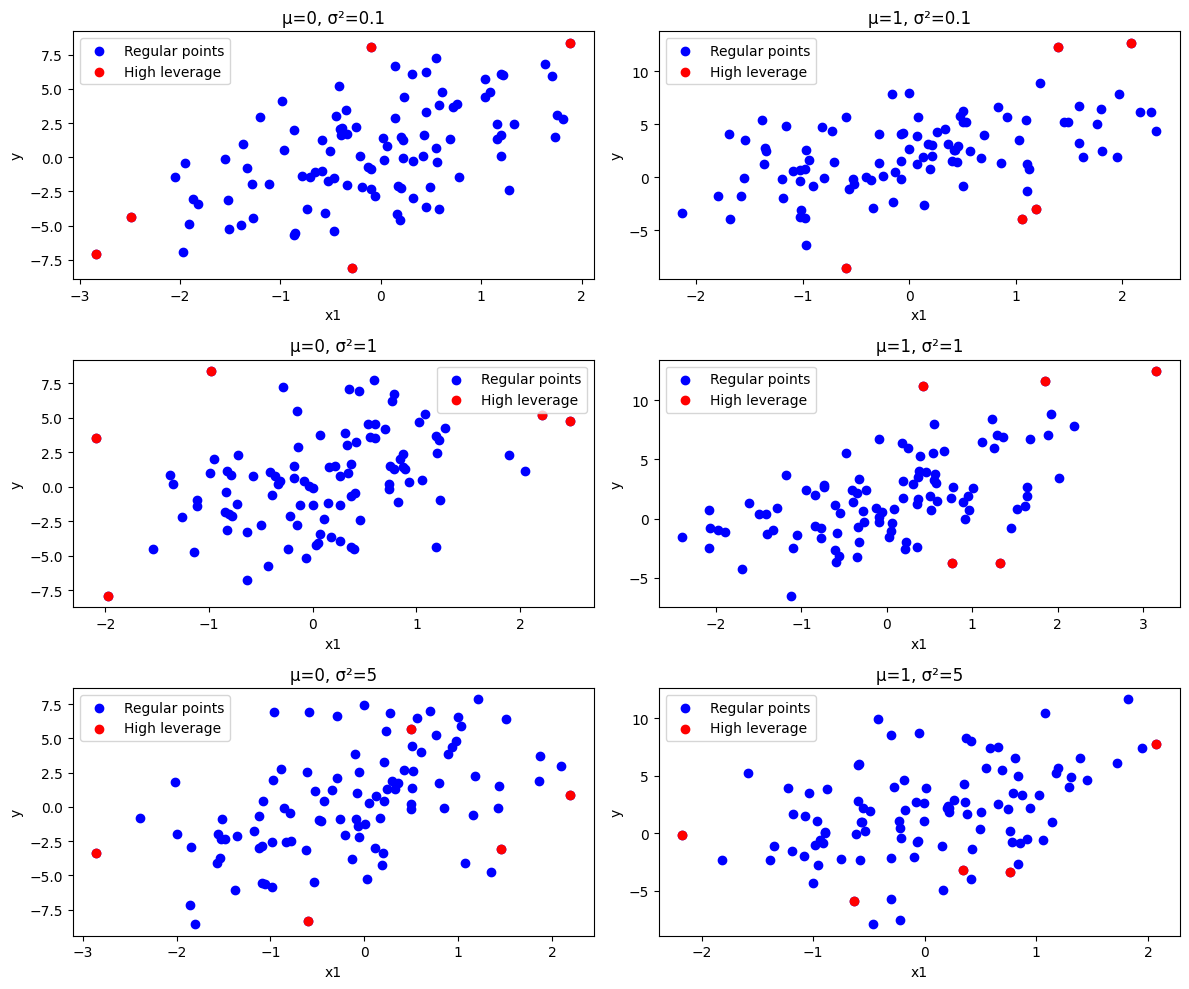

In [68]:
c = 1.0  # Additional intercept for 2D case

fig, axs = plt.subplots(len(sigma2_values), 2, figsize=(12, 10))

for i, sigma2 in enumerate(sigma2_values):
    for j, mu in enumerate(mu_values):
        # Generate regular points
        x1 = random_state.normal(0, 1, n_points)
        x2 = random_state.normal(0, 1, n_points)
        epsilon = random_state.normal(mu, np.sqrt(sigma2), n_points)
        y = a * x1 + b * x2 + c + epsilon
        
        # Reshape for linear regression
        X = np.column_stack((np.ones(n_points), x1, x2))  # Adding intercept term
        model = LinearRegression().fit(X, y)
        
        # Compute leverage scores
        scores = leverage_scores(X)
        high_leverage_indices = scores > np.quantile(scores, 0.95)
        
        # Plotting
        axs[i, j].scatter(x1, y, label="Regular points", color="blue")
        axs[i, j].scatter(x1[high_leverage_indices], y[high_leverage_indices], color="red", label="High leverage")
        
        # Labels and legend
        axs[i, j].set_title(f"μ={mu}, σ²={sigma2}")
        axs[i, j].set_xlabel("x1")
        axs[i, j].set_ylabel("y")
        axs[i, j].legend()

plt.tight_layout()
plt.show()

# Exercise 2

In [64]:
x_train, x_test, y_train, y_test = pyod.utils.data.generate_data_clusters(
    n_train=400,
    n_test=200,
    n_clusters=2,
    n_features=2,
    contamination=0.1
)

In [65]:
model = KNN(
    n_neighbors=5
)

model.fit(x_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

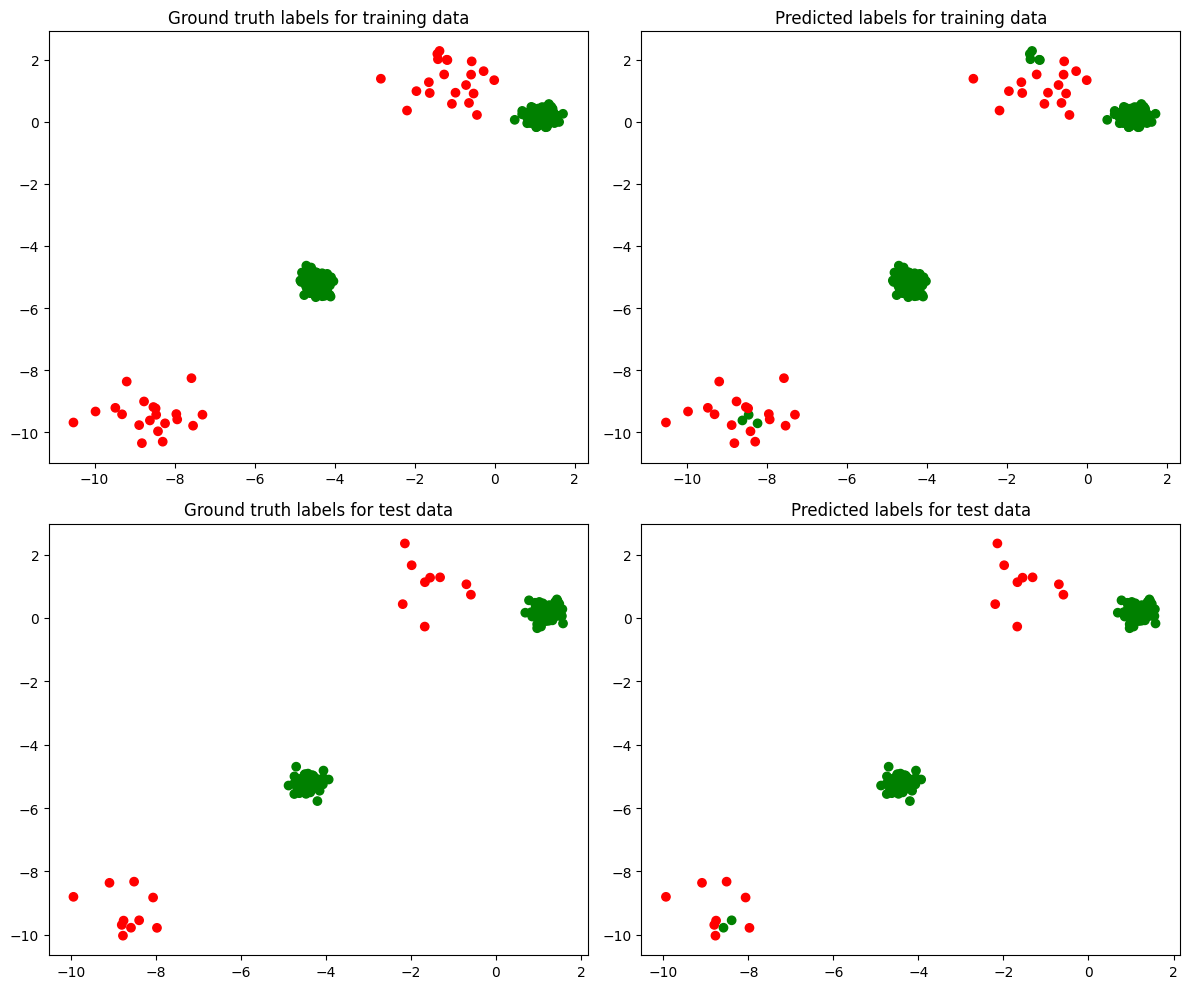

In [66]:
fig, axis = plt.subplots(2, 2, figsize=(12, 10))

colors = ["green" if label == 0 else "red" for label in y_train]
axis[0, 0].set_title("Ground truth labels for training data")
axis[0, 0].scatter(x_train[:, 0], x_train[:, 1], c=colors)

colors = ["green" if label == 0 else "red" for label in y_train_pred]
axis[0, 1].set_title("Predicted labels for training data")
axis[0, 1].scatter(x_train[:, 0], x_train[:, 1], c=colors)

colors = ["green" if label == 0 else "red" for label in y_test]
axis[1, 0].scatter(x_test[:, 0], x_test[:, 1], c=colors)
axis[1, 0].set_title("Ground truth labels for test data")

colors = ["green" if label == 0 else "red" for label in y_test_pred]
axis[1, 1].scatter(x_test[:, 0], x_test[:, 1], c=colors)
axis[1, 1].set_title("Predicted labels for test data")

plt.tight_layout()
plt.show()

In [62]:
train_acc = balanced_accuracy_score(y_train, y_train_pred)
test_acc = balanced_accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")

Training accuracy: 0.9111111111111111
Test accuracy: 0.9


# Exercise 3

In [82]:
x1, y1 = sklearn.datasets.make_blobs(
    n_samples=200,
    n_features=2,
    centers=None,
    cluster_std=2,
    center_box=(-10, -10)
)

x2, y2 = sklearn.datasets.make_blobs(
    n_samples=100,
    n_features=2,
    centers=None,
    cluster_std=6,
    center_box=(10, 10)
)

x = np.concatenate((x1, x2))
y = np.concatenate((y1, y2))

In [83]:
n_neighbours = 6

model_knn = KNN(
    n_neighbors=n_neighbours,
    contamination=0.07
)

model_knn.fit(x)

y_pred_knn = model_knn.predict(x)

model_lof = LOF(
    n_neighbors=n_neighbours,
    contamination=0.07
)

model_lof.fit(x)
y_pred_lof = model_lof.predict(x)

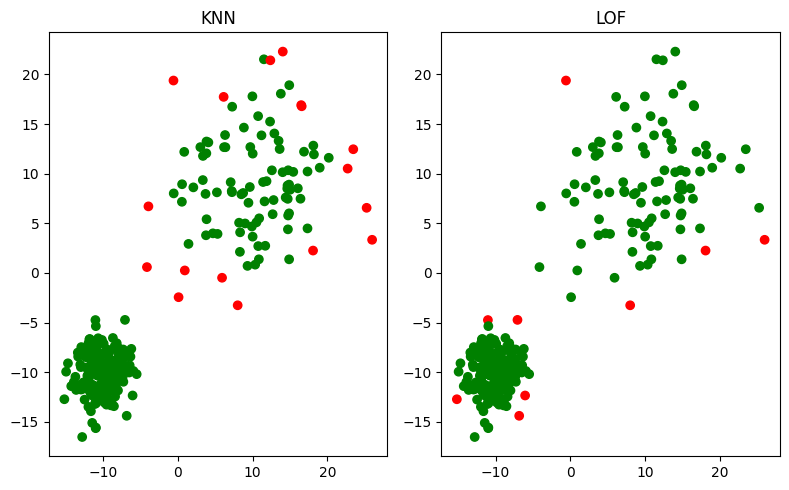

In [87]:
fig, axis = plt.subplots(1, 2, figsize=(8, 5))

colors = ["green" if label == 0 else "red" for label in y_pred_knn]
axis[0].set_title("KNN")
axis[0].scatter(x[:, 0], x[:, 1], c=colors)

colors = ["green" if label == 0 else "red" for label in y_pred_lof]
axis[1].set_title("LOF")
axis[1].scatter(x[:, 0], x[:, 1], c=colors)

plt.tight_layout()
plt.show()

# Exercise 4

## Load the dataset

In [69]:
data = scipy.io.loadmat("/home/cocolceru/facultate/anomaly_detection/lab2/cardio.mat")

x = data["X"]
y = data["y"].flatten()

### Split the data

In [70]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.33
)

print(len(x_train), len(x_test))

1226 605


### Normalize the data

In [71]:
x_train_norm, x_test_norm = pyod.utils.utility.standardizer(x_train, x_test)

## Train ensemble of classifiers

### KNN

In [72]:
train_scores = []
test_scores = []

for n in range(30, 120, (120-30) // 10):
    model = KNN(n_neighbors=n)
    model.fit(x_train_norm)
    
    train_score = model.decision_function(x_train_norm)
    test_score = model.decision_function(x_test_norm)
    
    y_train_pred = model.predict(x_train_norm)
    y_test_pred = model.predict(x_test_norm)
    
    train_acc = balanced_accuracy_score(y_train, y_train_pred)
    test_acc = balanced_accuracy_score(y_test, y_test_pred)

    print(f"n_neighbours={n}")
    print(f"Train accuracy: {train_acc:.4f}")
    print(f"Test accuracy: {test_acc:.4f}")
    print()

    train_scores.append(train_score)
    test_scores.append(test_score)

n_neighbours=30
Train accuracy: 0.7273
Test accuracy: 0.6494

n_neighbours=39
Train accuracy: 0.7454
Test accuracy: 0.6771

n_neighbours=48
Train accuracy: 0.7549
Test accuracy: 0.6947

n_neighbours=57
Train accuracy: 0.7597
Test accuracy: 0.7197

n_neighbours=66
Train accuracy: 0.7597
Test accuracy: 0.7216

n_neighbours=75
Train accuracy: 0.7688
Test accuracy: 0.7216

n_neighbours=84
Train accuracy: 0.7654
Test accuracy: 0.7216

n_neighbours=93
Train accuracy: 0.7740
Test accuracy: 0.7299

n_neighbours=102
Train accuracy: 0.7740
Test accuracy: 0.7382

n_neighbours=111
Train accuracy: 0.7831
Test accuracy: 0.7466



In [73]:
train_scores_norm = pyod.utils.utility.standardizer(np.array(train_scores).T)
test_scores_norm = pyod.utils.utility.standardizer(np.array(test_scores).T)

In [74]:
average_train_scores = pyod.models.combination.average(train_scores_norm)
average_test_scores = pyod.models.combination.average(test_scores_norm)
max_train_scores = pyod.models.combination.maximization(train_scores_norm)
max_test_scores = pyod.models.combination.maximization(test_scores_norm)

In [75]:
contamination_rate = np.sum(y) / len(y)

threshold_avg = np.quantile(average_train_scores, 1 - contamination_rate)
threshold_max = np.quantile(max_train_scores, 1 - contamination_rate)

average_predictions = (average_test_scores > threshold_avg).astype(int)
max_predictions = (max_test_scores > threshold_max).astype(int)

average_ba = balanced_accuracy_score(y_test, average_predictions)
max_ba = balanced_accuracy_score(y_test, max_predictions)

print(f"Balanced Accuracy - Average Strategy: {average_ba:.4f}")
print(f"Balanced Accuracy - Maximization Strategy: {max_ba:.4f}")

Balanced Accuracy - Average Strategy: 0.7206
Balanced Accuracy - Maximization Strategy: 0.7373


### LOF

In [76]:
train_scores = []
test_scores = []

for n in range(30, 120, (120-30) // 10):
    model = LOF(n_neighbors=n)
    model.fit(x_train_norm)
    
    train_score = model.decision_function(x_train_norm)
    test_score = model.decision_function(x_test_norm)
    
    y_train_pred = model.predict(x_train_norm)
    y_test_pred = model.predict(x_test_norm)
    
    train_acc = balanced_accuracy_score(y_train, y_train_pred)
    test_acc = balanced_accuracy_score(y_test, y_test_pred)

    print(f"n_neighbours={n}")
    print(f"Train accuracy: {train_acc:.4f}")
    print(f"Test accuracy: {test_acc:.4f}")
    print()

    train_scores.append(train_score)
    test_scores.append(test_score)

n_neighbours=30
Train accuracy: 0.5495
Test accuracy: 0.5227

n_neighbours=39
Train accuracy: 0.5611
Test accuracy: 0.5218

n_neighbours=48
Train accuracy: 0.5602
Test accuracy: 0.5264

n_neighbours=57
Train accuracy: 0.5663
Test accuracy: 0.5208

n_neighbours=66
Train accuracy: 0.5915
Test accuracy: 0.5661

n_neighbours=75
Train accuracy: 0.6325
Test accuracy: 0.5837

n_neighbours=84
Train accuracy: 0.6563
Test accuracy: 0.6031

n_neighbours=93
Train accuracy: 0.6658
Test accuracy: 0.6281

n_neighbours=102
Train accuracy: 0.6896
Test accuracy: 0.6374

n_neighbours=111
Train accuracy: 0.7082
Test accuracy: 0.6559



In [77]:
train_scores_norm = pyod.utils.utility.standardizer(np.array(train_scores).T)
test_scores_norm = pyod.utils.utility.standardizer(np.array(test_scores).T)

In [78]:
average_train_scores = pyod.models.combination.average(train_scores_norm)
average_test_scores = pyod.models.combination.average(test_scores_norm)
max_train_scores = pyod.models.combination.maximization(train_scores_norm)
max_test_scores = pyod.models.combination.maximization(test_scores_norm)

In [79]:
contamination_rate = np.sum(y) / len(y)

threshold_avg = np.quantile(average_train_scores, 1 - contamination_rate)
threshold_max = np.quantile(max_train_scores, 1 - contamination_rate)

average_predictions = (average_test_scores > threshold_avg).astype(int)
max_predictions = (max_test_scores > threshold_max).astype(int)

# Calculate balanced accuracy for both strategies
average_ba = balanced_accuracy_score(y_test, average_predictions)
max_ba = balanced_accuracy_score(y_test, max_predictions)

print(f"Balanced Accuracy - Average Strategy: {average_ba:.4f}")
print(f"Balanced Accuracy - Maximization Strategy: {max_ba:.4f}")

Balanced Accuracy - Average Strategy: 0.5309
Balanced Accuracy - Maximization Strategy: 0.6031
